In [1]:
!git clone https://github.com/bipin-saha/BanglaNLP-Sentiment-Analysis.git

Cloning into 'BanglaNLP-Sentiment-Analysis'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 39 (delta 1), reused 5 (delta 1), pack-reused 33
Receiving objects: 100% (39/39), 49.52 MiB | 24.37 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, re
from sklearn.model_selection import train_test_split
import keras

In [3]:
from keras.preprocessing.text import Tokenizer

In [4]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out


In [5]:
df = pd.read_csv('/content/BanglaNLP-Sentiment-Analysis/Dataset/Text_Augmented_file16k.csv')
display(df)

,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,0.0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,1.0,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,2.0,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,3.0,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,4.0,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
...,...,...,...,...,...,...
16107,9455,NaN,NaN,NaN,পাশ্চাত্য যুগে পুরোনো নাম ছিঃ,0
16108,9456,NaN,NaN,NaN,মধ্যযুগীয় যুগে পুরোনো নাম ছিঃ,0
16109,9457,NaN,NaN,NaN,প্রাচীন যুগে পুরোনো নাম ছিঃ,0
16110,9458,NaN,NaN,NaN,রেনেসাঁ যুগে পুরোনো নাম ছিঃ,0


In [6]:
# Display general information about the DataFrame
print("DataFrame Information:")
print(df.info())

# Display the number of rows and columns in the DataFrame
print("\nDataFrame Shape:")
print(df.shape)

# Display the total number of elements in the DataFrame
print("\nDataFrame Size:")
print(df.size)

# Display descriptive statistics of the DataFrame
print("\nDataFrame Descriptive Statistics:")
print(df.describe())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(df.tail())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16112 entries, 0 to 16111
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  16112 non-null  int64  
 1   Unnamed: 0    6652 non-null   float64
 2   Unnamed: 1    0 non-null      float64
 3   Unnamed: 2    0 non-null      float64
 4   sentence      16112 non-null  object 
 5   sentiment     16112 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 755.4+ KB
None

DataFrame Shape:
(16112, 6)

DataFrame Size:
96672

DataFrame Descriptive Statistics:
       Unnamed: 0.1   Unnamed: 0  Unnamed: 1  Unnamed: 2     sentiment
count  16112.000000  6652.000000         0.0         0.0  16112.000000
mean    4149.844588  3325.500000         NaN         NaN      0.449789
std     2525.727021  1920.411327         NaN         NaN      0.497488
min        0.000000     0.000000         NaN         NaN      0.000000
25%     2013.7

In [7]:
df['sentiment'].value_counts()

0    8865
1    7247
Name: sentiment, dtype: int64

In [8]:
df.reset_index(drop=True, inplace=True)
df['sentence'] = df.sentence.apply(lambda x: preprocessing(str(x)))

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dropout, Dense, Bidirectional, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [10]:
vocab_size = 20000
embedding_dim = 300
max_length = 150
trunc_type='post'
oov_tok = ""

In [11]:
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(128, kernel_size=3, activation="relu"))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='sigmoid'))
    adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 300)          6000000   
                                                                 
 conv1d (Conv1D)             (None, 148, 128)          115328    
                                                                 
 bidirectional (Bidirection  (None, 148, 256)          263168    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 148, 256)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                1

Fold-1

In [15]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences

# Splitting into features (sentences) and labels
sentences = df['sentence'].values
labels = df['sentiment'].values

# Convert labels to categorical
labels = keras.utils.to_categorical(labels)

# Initializing KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_number = 1
for train_index, test_index in kf.split(sentences):
    train_sentences, test_sentences = sentences[train_index], sentences[test_index]
    train_labels, test_labels = labels[train_index], labels[test_index]

    training_sentences = []
    testing_sentences = []

    for i in range(train_sentences.shape[0]):
        x = str(train_sentences[i])
        training_sentences.append(x)

    training_sentences = np.array(training_sentences)

    for i in range(test_sentences.shape[0]):
        x = str(test_sentences[i])
        testing_sentences.append(x)

    testing_sentences = np.array(testing_sentences)



    tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences)
    word_index = tokenizer.word_index
    print(len(word_index))


    sequences = tokenizer.texts_to_sequences(training_sentences)
    padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


    test_sequences = tokenizer.texts_to_sequences(testing_sentences)
    testing_padded = pad_sequences(test_sequences,maxlen=max_length)

    history=model.fit(padded,train_labels,epochs=100,batch_size=512,
                  validation_data=(testing_padded,test_labels),
                  use_multiprocessing=True, workers=8)

    print("######### END OF FOLD : ", fold_number, "#########")
    model_name = "sentiment_fold_"+str(fold_number)+".h5"
    model.save_weights(model_name)
    fold_number = fold_number + 1






21807
Epoch 1/100
26/26 [==============================] - 5s 174ms/step - loss: 0.5504 - accuracy: 0.7722 - val_loss: 0.3609 - val_accuracy: 0.8548
Epoch 2/100
26/26 [==============================] - 5s 188ms/step - loss: 0.2203 - accuracy: 0.9285 - val_loss: 0.2694 - val_accuracy: 0.9004
Epoch 3/100
26/26 [==============================] - 5s 199ms/step - loss: 0.1211 - accuracy: 0.9673 - val_loss: 0.2386 - val_accuracy: 0.9184
Epoch 4/100
26/26 [==============================] - 5s 184ms/step - loss: 0.0704 - accuracy: 0.9829 - val_loss: 0.2410 - val_accuracy: 0.9203
Epoch 5/100
26/26 [==============================] - 4s 173ms/step - loss: 0.0429 - accuracy: 0.9914 - val_loss: 0.2530 - val_accuracy: 0.9252
Epoch 6/100
26/26 [==============================] - 5s 179ms/step - loss: 0.0288 - accuracy: 0.9959 - val_loss: 0.2584 - val_accuracy: 0.9271
Epoch 7/100
26/26 [==============================] - 5s 193ms/step - loss: 0.0206 - accuracy: 0.9974 - val_loss: 0.2722 - val_accuracy: 

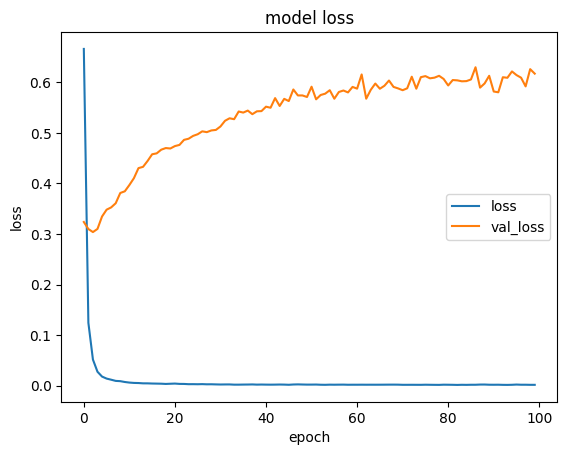

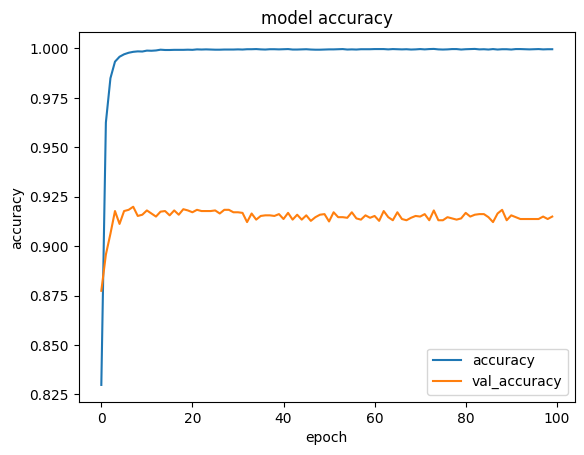

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

